#Clone repository

In [1]:
!git clone https://github.com/hospitaldeamor/JC_06_MLP.git


Cloning into 'JC_06_MLP'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 20 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 7.58 MiB | 15.49 MiB/s, done.
Resolving deltas: 100% (3/3), done.


#Breast Cancer Winsconsing Data

In this project, we use MLP (Multilayer Perceptron) to build and train a model using breast cancer records, and classify the data in benign or malignant.

##Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score

##Look at the dataset

In [ ]:
# Load the breast cancer dataset
# Read the CSV file containing the dataset
breast_cancer = pd.read_csv('/content/JC_06_MLP/breast-cancer-wisconsin-data/data.csv')
# Display the first 5 rows of the dataset
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Get the shape (number of rows and columns) of the dataset
breast_cancer.shape

In [ ]:
# Get the size of each group based on the 'diagnosis' column (Malignant 'M' or Benign 'B')
breast_cancer.groupby('diagnosis').size()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


##Preprocessing data

In [ ]:
#check the number of columns with no information
breast_cancer.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
# Features "id" and "Unnamed: 32" are not useful
feature_names = breast_cancer.columns[2:-1]
X = breast_cancer[feature_names]
# "diagnosis" feature is our class which I wanna predict
y = breast_cancer.diagnosis

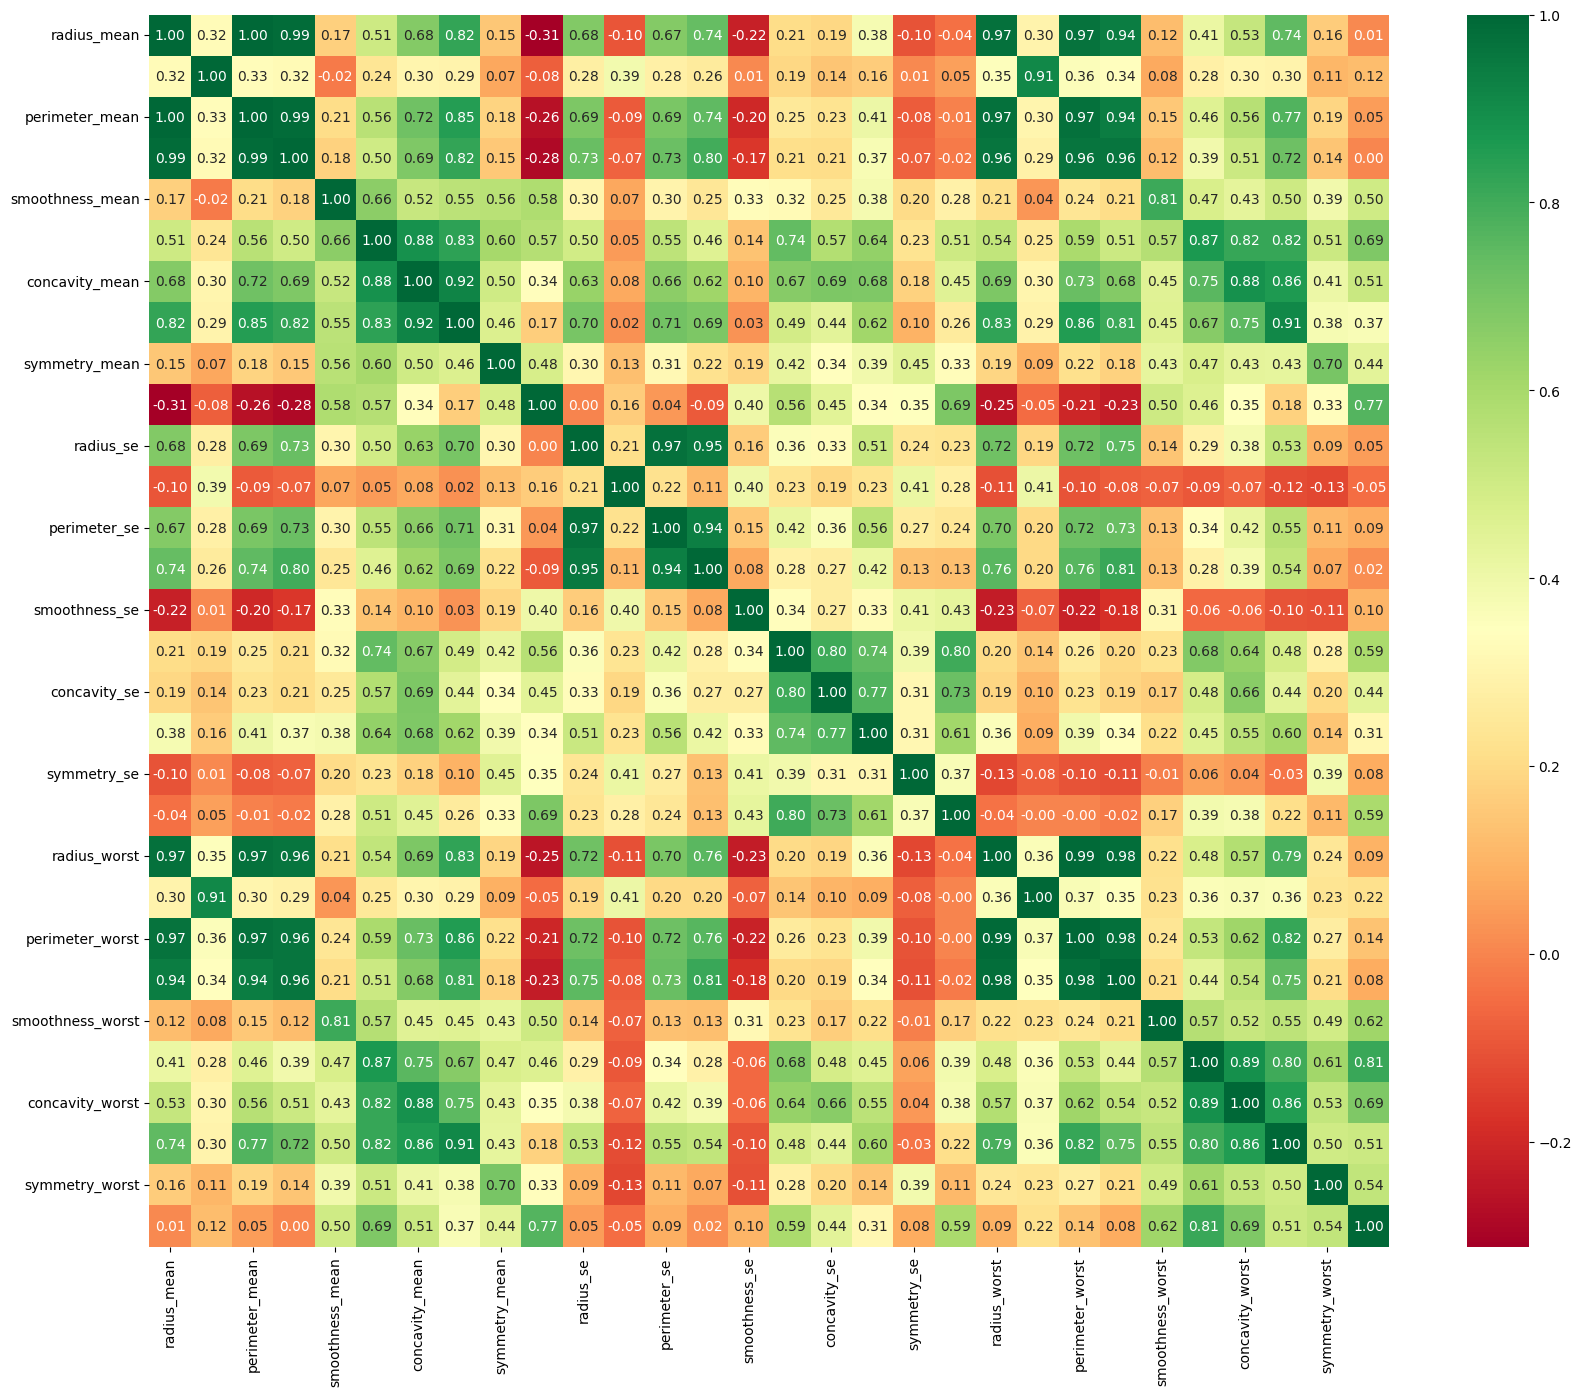

In [ ]:
# Encode the 'diagnosis' labels into numerical values: 'M' -> 1 (Malignant), 'B' -> 0 (Benign)
class_le = LabelEncoder()
# M -> 1 and B -> 0
y = class_le.fit_transform(breast_cancer.diagnosis.values)

# Generate a correlation heatmap for features in the dataset
# 'X' should contain the features excluding the target 'diagnosis'
sns.heatmap(
    data=X.corr(),
    annot=True,
    fmt='.2f',
    cmap='RdYlGn'
)

fig = plt.gcf()
fig.set_size_inches(20, 16)

plt.show()

##Modeling

In [ ]:
# Create a pipeline for preprocessing and classification
pipe = Pipeline(steps=[
    ('preprocess', StandardScaler()),
    ('classification', MLPClassifier())
])

In [ ]:
# Set random state for reproducibility
random_state = 42

# Define the hyperparameter grids for MLPClassifier
mlp_activation = ['identity', 'logistic', 'tanh', 'relu']
mlp_solver = ['lbfgs', 'sgd', 'adam']
mlp_max_iter = range(1000, 10000, 1000)
mlp_alpha = [1e-4, 1e-3, 0.01, 0.1, 1]

# Define different preprocessing methods
preprocess = [Normalizer(), MinMaxScaler(), StandardScaler(), RobustScaler(), QuantileTransformer()]

In [ ]:
# Create a parameter grid for GridSearchCV to tune hyperparameters
mlp_param_grid = [
    {
        'preprocess': preprocess,
        'classification__activation': mlp_activation,
        'classification__solver': mlp_solver,
        'classification__random_state': [random_state],
        'classification__max_iter': mlp_max_iter,
        'classification__alpha': mlp_alpha
    }
]

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.3
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(398, 30) (398,)
(171, 30) (171,)


##Training and evaluation

In [ ]:
# Apply standard scaling to the data
scaler = StandardScaler()
print('\nData preprocessing with {scaler}\n'.format(scaler=scaler))

# Preprocess the training and testing datasets using StandardScaler
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# Create an MLPClassifier with hyperparameters
mlp = MLPClassifier(
    max_iter=1000,
    alpha=0.1,
    activation='logistic',
    solver='adam',
    random_state=42
)

# Train the MLP model using the scaled training data
mlp.fit(X_train_scaler, y_train)

# Make predictions on the test set
mlp_predict = mlp.predict(X_test_scaler)
mlp_predict_proba = mlp.predict_proba(X_test_scaler)[:, 1]

print('MLP Accuracy: {:.2f}%'.format(accuracy_score(y_test, mlp_predict) * 100))
print('MLP AUC: {:.2f}%'.format(roc_auc_score(y_test, mlp_predict_proba) * 100))
print('MLP Classification report:\n\n', classification_report(y_test, mlp_predict))
print('MLP Testing set score: {:.2f}%'.format(mlp.score(X_test_scaler, y_test) * 100))


Data preprocessing with StandardScaler()

MLP Accuracy: 99.42%
MLP AUC: 99.84%
MLP Classification report:

               precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       1.00      0.98      0.99        63

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

MLP Testing set score: 99.42%


<Axes: >

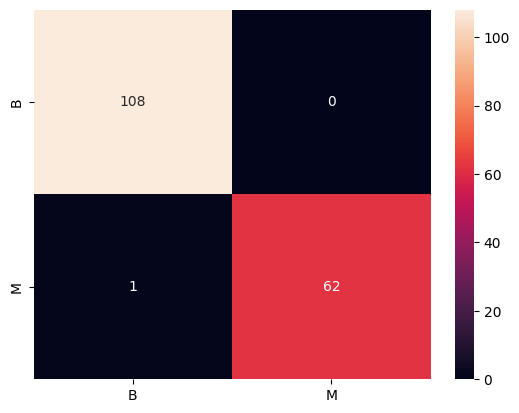

In [ ]:
# Get unique labels for the confusion matrix (Benign, Malignant)
outcome_labels = sorted(breast_cancer.diagnosis.unique())

# Confusion Matrix for MLPClassifier
sns.heatmap(
    confusion_matrix(y_test, mlp_predict),
    annot=True,
    fmt="d",
    xticklabels=outcome_labels,
    yticklabels=outcome_labels
)

##K-Fold Cross-Validation

In [ ]:
# K-Fold Cross-Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation: using accuracy as the metric
acc = cross_val_score(mlp, X_train_scaler, y_train, cv=cv, scoring='accuracy')

# Print accuracy scores for each fold
for fold, score in enumerate(acc, 1):
    print(f'Fold {fold} Accuracy = {score:.4f}')

# Print the average accuracy across all folds
print(f'\nAverage Accuracy: {np.mean(acc) * 100:.2f}%')

In [ ]:
# Cross-validation with ROC AUC score
auc_scorer = make_scorer(roc_auc_score)
auc = cross_val_score(mlp, X_train_scaler, y_train, cv=cv, scoring=auc_scorer)

# Print AUC scores for each fold
for fold, score in enumerate(auc, 1):
    print(f'Fold {fold} AUC = {score:.4f}')

# Print the average AUC across all folds
print(f'\nAverage AUC: {np.mean(auc) * 100:.2f}%')

Fold 1 Accuracy = 0.9500
Fold 2 Accuracy = 0.9750
Fold 3 Accuracy = 0.9875
Fold 4 Accuracy = 0.9873
Fold 5 Accuracy = 0.9873

Average Accuracy: 97.74%
Fold 1 AUC = 0.9414
Fold 2 AUC = 0.9733
Fold 3 AUC = 0.9815
Fold 4 AUC = 0.9808
Fold 5 AUC = 0.9857

Average AUC: 97.25%


#MRI tumor classification

##Import libraries

In [15]:
import numpy as np
import pandas as pd
import cv2
import os
from os import listdir
import seaborn as sns
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc

##Preprocessing data

In [ ]:
!unzip /content/JC_06_MLP/brain-mri-tumor-dataset/data.zip -d /content/JC_06_MLP/brain-mri-tumor-dataset/

#set up the directory
image_dir="/content/JC_06_MLP/brain-mri-tumor-dataset/data/"

Function to load images from the directory and perform pre-processing, including:
* resizing to 240x240 mm
* normalizing the scale so that the intensity of the images is between 0 and 1 instead of 0 to 255 (grayscale)
* Turning the labels from categorical to numeric (without tumor = 0, with tumor = 1)

In [3]:
def load_data(dir_list, image_size=(240, 240)):  # Added image_size argument with default (224, 224)
    X = []
    y = []

    for directory in dir_list:
        for filename in listdir(directory):
            image = cv2.imread(directory + '/' + filename)
            # Resize image to the standard size
            image = cv2.resize(image, image_size, interpolation=cv2.INTER_CUBIC)
            # Normalize the image (optional, for better performance with neural networks)
            image = image / 255.0
            X.append(image)

            # Append label: 1 for 'yes' folder, 0 for 'no' folder
            if directory[-3:] == 'yes':
                y.append([1])
            else:
                y.append([0])

    X = np.array(X)
    y = np.array(y)

    # Shuffle the data
    X, y = shuffle(X, y)

    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')

    return X, y

Processing to crop the image as much as possible to remove the black background and leave only the brain.

In [6]:
def crop_brain_contour(image, plot=False, target_size=(240, 240)):
    # Ensure the image is in uint8 format
    if image.dtype != 'uint8':
        image = (image * 255).astype('uint8')

    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # Use the grayscale image for Gaussian blur

    # Apply thresholding to get a binary image (single-channel)
    _, thresh = cv2.threshold(blurred, 45, 255, cv2.THRESH_BINARY)
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Ensure thresh is single-channel (grayscale) before passing to findContours
    if len(thresh.shape) == 3:
        thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)

    # Find contours in thresholded image, then grab the largest one
    cnts, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

    # Crop new image out of the original image using the four extreme points (left, right, top, bottom)
    for c in cnts:
        x, y, w, h = cv2.boundingRect(c)
        new_image = image[y:y+h, x:x+w]
        break

    # Resize the cropped image to the target size
    new_image_resized = cv2.resize(new_image, target_size)

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False, labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image_resized)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False, labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()

    return new_image_resized

def Croping_Data(train, target_size=(240, 240)):
    # Load all images in a directory
    X = []
    y = []

    for img in train:
        if img.dtype != 'uint8':
            img = (img * 255).astype('uint8')  # Convert to uint8 if not already
        image = crop_brain_contour(img, plot=False, target_size=target_size)
        X.append(image)

    X = np.array(X)

    return X

In [7]:
#function to split dataset in train, validation and test
def split_data(X, y, test_size=0.2):

    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=test_size)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)

    return X_train, y_train, X_val, y_val, X_test, y_test

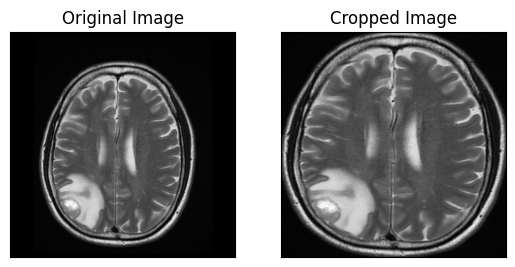

In [10]:
#Application in one image to test the crop function
ex_img = cv2.imread(image_dir+'yes/Y107.jpg')
ex_crop_img = crop_brain_contour(ex_img, True)

In [11]:
#load the data in the directory
X_train,y_train = load_data([image_dir+'yes', image_dir+'no'], image_size=(240, 240))

#preprocess the data
X = Croping_Data(X_train)
y = y_train

Number of examples is: 253
X shape is: (253, 240, 240, 3)
y shape is: (253, 1)


In [12]:
#Slip the dataset in train, validation and test
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, test_size=0.3)

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of validation examples = " + str(X_val.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

number of training examples = 177
number of validation examples = 38
number of test examples = 38
Training data and target sizes: 
(177, 240, 240, 3), (177, 1)
Test data and target sizes: 
(38, 240, 240, 3), (38, 1)


In [13]:
#Convert the images from 3D arrays (height, width, channels) to a 2D array
X_train = X_train.reshape(X_train.shape[0], 172800)
y_train = y_train.reshape(y_train.shape[0], )
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))

X_val = X_val.reshape(X_val.shape[0], 172800)
y_val = y_val.reshape(y_val.shape[0], )
print('Validation data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))

X_test = X_test.reshape(X_test.shape[0], 172800)
y_test = y_test.reshape(y_test.shape[0], )
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(177, 172800), (177,)
Validation data and target sizes: 
(177, 172800), (177,)
Test data and target sizes: 
(38, 172800), (38,)


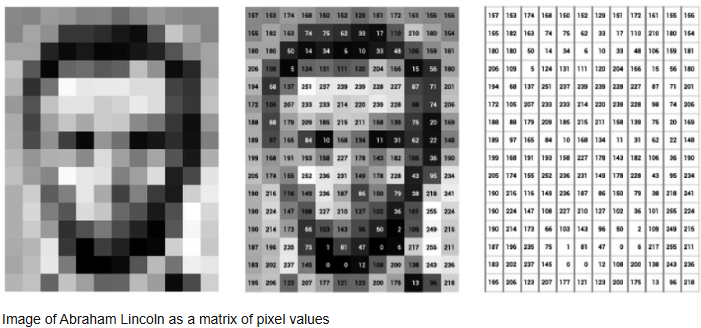

Fonte: https://www.researchgate.net/figure/mage-of-Abraham-Lincoln-as-a-matrix-of-pixel-values_fig1_330902210

In [16]:
#Visualize the dataset distribution
y = dict()
y[0] = []
y[1] = []
for set_name in (y_train, y_val, y_test):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))

trace0 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[0],
    name='No',
    marker=dict(color='#33cc33'),
    opacity=0.7
)
trace1 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[1],
    name='Yes',
    marker=dict(color='#ff3300'),
    opacity=0.7
)
data = [trace0, trace1]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)
fig = go.Figure(data, layout)
iplot(fig)

##Modeling

In [17]:
# Function to create the MLP model
def create_mlp(input_dim):
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # For binary classification
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [18]:
# Train the MLP model
def train_mlp(X_train, y_train, X_val, y_val):
    input_dim = X_train.shape[1]  # The input dimension should match the number of features
    model = create_mlp(input_dim)

    # Fit the model with training data
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
    return model

# Train the MLP model with the reshaped data
model = train_mlp(X_train, y_train, X_val, y_val)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 552ms/step - accuracy: 0.5121 - loss: 6193.2476 - val_accuracy: 0.6579 - val_loss: 7633.7222
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5646 - loss: 6543.3716 - val_accuracy: 0.6579 - val_loss: 3027.5503
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5751 - loss: 3805.5510 - val_accuracy: 0.6579 - val_loss: 1772.5177
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5393 - loss: 1949.3351 - val_accuracy: 0.6842 - val_loss: 351.6031
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6558 - loss: 461.7063 - val_accuracy: 0.6579 - val_loss: 818.5889
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6018 - loss: 631.3875 - val_accuracy: 0.3947 - val_loss: 782.0073
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6294 - loss: 273.5717 - val_accuracy: 0.7895 - val_loss: 262.2812
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7609 - loss: 141.4290 - va

##Evaluation

In [19]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5175 - loss: 370.9286
Test accuracy: 0.5263158082962036


In [20]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# If the model outputs probabilities (e.g., sigmoid), you need to convert them to class labels (0 or 1)
y_pred = (y_pred > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
              precision    recall  f1-score   support

           0       0.45      0.93      0.61        15
           1       0.86      0.26      0.40        23

    accuracy                           0.53        38
   macro avg       0.65      0.60      0.50        38
weighted avg       0.70      0.53      0.48        38



Confusion Matrix:
[[14  1]
 [17  6]]


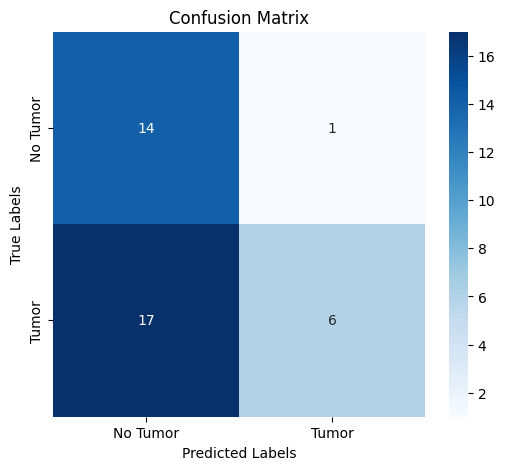

In [21]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Tumor", "Tumor"], yticklabels=["No Tumor", "Tumor"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


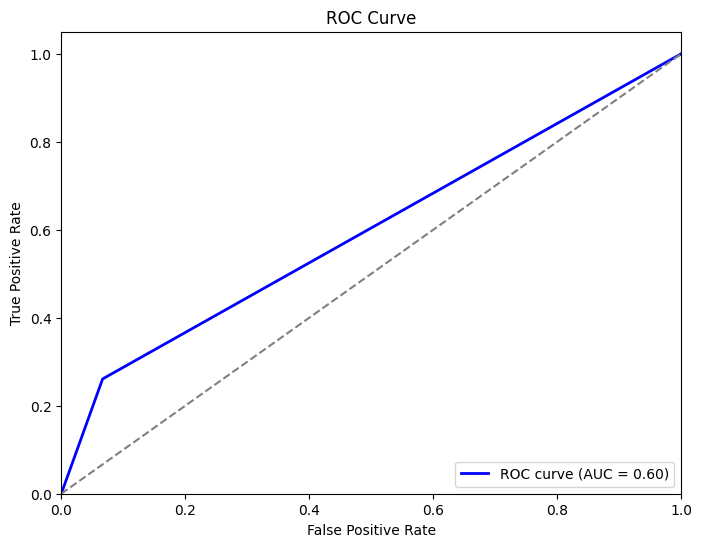

In [22]:
from sklearn.metrics import roc_curve, auc

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()